<a href="https://colab.research.google.com/github/AyhamAlomari/Abstractive-Text-Summarization-Seq2Seq-using-GRU/blob/master/TextSummarizerGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**References:**

1- Sequence Models (Course 5 of the Deep Learning Specialization), Deeplearning.ai, **Andrew Ng**

https://www.youtube.com/playlist?list=PLkDaE6sCZn6F6wUI9tvS_Gw1vaFAx6rd6

2-	Comprehensive Guide to Text Summarization using Deep Learning in Python, **Aravind Pai**

https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/#comment-160299

3- A ten-minute introduction to sequence-to-sequence learning in Keras, **Francois Chollet**

https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html



**Abstractive Text Summarization**

First, we can form our problem as a sequence-to-sequence problem (a sequence prediction problem) at word-level where the input sequences are long english statement(s) and the output is a shorter-length, same-meaning, different-words summary. 

In general, the input sequences and output sequences in **sequence-to-sequence learning** have different lengths (such as text summarization and machine translation) and the entire input sequence is required in order to start predicting the target.

In Keras, the process is done as follow:
- A RNN layer (Here, we will use GRU) acts as "Encoder": it processes the input sequence and returns its own internal state. 
- Another RNN layer (GRU) acts as "Decoder": it is trained to predict the next words of the target sequence, given previous words of the target sequence.

**Dataset**

Amazon Fine Food reviews

**Other Required Files**

attention layer file.

Note: Keras has a built-in Attention class. Unfortunately, it is more suitable for CNNs than RNNs. Therefore, we will use a third-paty attention layer file.

Now, Let's start coding


The code will follow these steps:

1- Importing Libraries and Reading the dataset

2- Dataset general information

3- Dropping unuseful columns and null/duplicated rows

4- Dataset Preprocessing and Cleaning

5- Splitting the dataset into Training and Testing

6- Determining the maximum lengths of texts and summaries

7- Preparing our data for deep learning (Tokenizer/Vocabulary)

8- Building the model

A) Setting up the Model

B) Training the Model

9) Inference Model (Predicting)

#**1- Importing Libraries and Reading the dataset**

In [ ]:

import tensorflow.keras
#import tensorflow as tf
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input, GRU, Dense, Embedding, TimeDistributed, Concatenate
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.layers import Attention
from attention import AttentionLayer
from sklearn import model_selection
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re


#nltk.download('stopwords')


dataset=pd.DataFrame(pd.read_csv("Reviews.csv",nrows=100000))



#  **2- Dataset general information**








1.   shape
2.   columns names
3.   null rows

In [ ]:
dataset.shape

(100000, 10)

In [ ]:
dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
dataset.info()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             99996 non-null   object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 99998 non-null   object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


Id                        0
ProductId                 0
UserId                    0
ProfileName               4
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

# **3- Dropping unuseful columns and null/duplicated rows**

In [ ]:

dataset=dataset.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
                      'HelpfulnessDenominator', 'Score', 'Time'],axis=1)

In [ ]:
dataset.shape

(100000, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Summary  99998 non-null   object
 1   Text     100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
dataset.dropna(inplace=True,axis=0)
dataset.drop_duplicates(subset='Text')

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...
...,...,...
99995,yummy!,I just love it and will buy another box when I...
99996,Tastes like More!,My late father in law used to have a rating sy...
99997,Great ramen,This is my favorite brand of Korean ramen. It ...
99998,Spicy!!,"I do like these noodles although, to say they ..."


In [ ]:
dataset.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99998 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Summary  99998 non-null  object
 1   Text     99998 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
dataset.isnull().sum()

Summary    0
Text       0
dtype: int64

# **4- Dataset Preprocessing and Cleaning**



1.   Identifying contractions as a dictionary

In [ ]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
"haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have",
"he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how does",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am",
"I've": "I have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
"it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not",
"might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
"she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
"shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so is",
"that'd": "that had", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
"to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
"we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
"who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
"y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
"you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

2-   Converting all words in text and summary into lower case

3-   Mapping contractions

4-   Removing stopwords (except negation and comparing words; I think these words are important and affect the meaning of the whole sentence; so I kept them there)

5-   Removing all special characters

6-   Adding "START" and "EOS" tokens


In [ ]:

#Defining and customizing the stopwords 
all_stop_words=set(stopwords.words('english'))
wanted_words=['so','not','no','nor','but','only','until','against','off','out','each','all','any','few','more','most',
                'some','other','same','too','very','just', 'as','than']
stop_words=[sw for sw in all_stop_words if not sw in wanted_words]

#Defining the function of cleaning
def cleaning_data(textdata):
  #2
   textdatanew = textdata.lower()
  #3
   textdatanew=[contractions[token] if token in contractions else token for token in textdatanew.split()]
   textdatanew=" ".join(textdatanew)
  #Now, all negation expressions use the word "not"
  #4
   textdatanew=[s for s in textdatanew.split() if not s in stop_words]
   textdatanew=" ".join(textdatanew)
  #5
   textdatanew = re.sub(r'[^a-zA-Z]',' ', textdatanew)
  
   return textdatanew

#modifying our dataset with new cleaned data
new_text = []
new_summary=[]
for text in dataset.Text:
    new_text.append(cleaning_data(text))
    
for summary in dataset.Summary:
    new_summary.append(cleaning_data(summary))

dataset['New_Text']=new_text
dataset['New_Summary']=new_summary
#6
#dataset['New_Text'] = dataset['New_Text'].apply(lambda x : '<START> '+ x + ' <END>')
dataset['New_Summary'] = dataset['New_Summary'].apply(lambda x : '<START>'+ x + '<EOS>')


Previewing the cleaned texts and summaries

In [ ]:
#dataset.head()
for i in range(7):
  print("Text ",i+1,": ")
  print(dataset['New_Text'][i])
  print("Summary: ")
  print(dataset['New_Summary'][i])
  print('-------------------------------------')


Text  1 : 
bought several vitality canned dog food products found all good quality  product looks more like stew than processed meat smells better  labrador finicky appreciates product better than most 
Summary: 
<START>good quality dog food<EOS>
-------------------------------------
Text  2 : 
product arrived labeled as jumbo salted peanuts   the peanuts actually small sized unsalted  not sure error vendor intended represent product as  jumbo  
Summary: 
<START>not as advertised<EOS>
-------------------------------------
Text  3 : 
confection around few centuries  light  pillowy citrus gelatin nuts   case filberts  cut tiny squares liberally coated powdered sugar  tiny mouthful heaven  not too chewy  very flavorful  highly recommend yummy treat  familiar story c s  lewis   the lion  witch  wardrobe    treat seduces edmund selling out brother sisters witch 
Summary: 
<START> delight  says all<EOS>
-------------------------------------
Text  4 : 
looking secret ingredient robitussin bel

# **5- Splitting the dataset into Training and Testing**

In [ ]:
print(dataset.shape)
x_train, x_test, y_train, y_test= model_selection.train_test_split(dataset['New_Text'], dataset['New_Summary'], test_size=0.20,random_state=30, shuffle=False)

(99998, 4)


In [ ]:
print('x_train: ',x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (79998,)
y_train:  (79998,)
x_test:  (20000,)
y_test:  (20000,)



# **6- Determining the maximum lengths of texts and summaries**

In [ ]:


# def data_lengths(textdata):
#   data_length=[]
#   for example in textdata:
#     data_length.append(len(example.split()))

text_lengths=[]
summary_lengths=[]

for text in dataset['New_Text']:
  text_lengths.append(len(text.split()))
for summary in dataset.New_Summary:
  summary_lengths.append(len(summary.split()))
#text_lengths=data_lengths(dataset['Text'])
#summary_lengths=data_lengths(dataset['Summary'])

print(text_lengths[:10])
print(summary_lengths[:10])


[28, 22, 47, 22, 14, 48, 32, 15, 17, 16]
[4, 3, 4, 2, 2, 2, 8, 3, 2, 3]


Looking for the most suitable **length**

In [ ]:
print('Text Lengths:')
print(pd.DataFrame(text_lengths).describe())

print("85% of text lengths is: ",np.percentile(text_lengths,85))
print("90% of text lengths is: ",np.percentile(text_lengths,90))

print('_____________________________')

print('Summary Lengths:')
print(pd.DataFrame(summary_lengths).describe())

print("85% of summary lengths is: ",np.percentile(summary_lengths,85))
print("90% of summary lengths is: ",np.percentile(summary_lengths,90))

Text Lengths:
                  0
count  99998.000000
mean      50.019490
std       51.039005
min        4.000000
25%       21.000000
50%       34.000000
75%       60.000000
max     1898.000000
85% of text lengths is:  82.0
90% of text lengths is:  101.0
_____________________________
Summary Lengths:
                  0
count  99998.000000
mean       3.635013
std        1.932578
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       22.000000
85% of summary lengths is:  5.0
90% of summary lengths is:  6.0


Specifying the maximum lengths for both Texts and Summaries

In [ ]:
max_text_length=95
max_summary_length=8

# *7- Preparing our data for deep learning (Tokenizer/Vocabulary)*

1- Building the vocabulary / Constructing the Tokenizer

2- Assigning an integer "index" for each word, based on its frequencey on the "fitting" text; the first words are the most appeared

3- Converting/Encoding each text/summary into its corresponding integer list/sequence based on the vocabulary built in steps 1 and 2

4- padding each sequuence to the same length  

In [ ]:
#1
text_tokenizer= Tokenizer()
#2
#fit the tokenizer on our text training data "Filling the vocabulary"
text_tokenizer.fit_on_texts(x_train)

#some information about our vocabulary:
#print(text_tokenizer.word_index)
#print(text_tokenizer.word_counts)
text_vocab_size=len(text_tokenizer.word_counts)+1
print('Text Vocabulary Size= ',text_vocab_size)

#print(text_tokenizer.document_count)
#print(text_tokenizer.word_docs)

#3
x_train=text_tokenizer.texts_to_sequences(x_train)
x_test=text_tokenizer.texts_to_sequences(x_test)

#4
x_train= pad_sequences(x_train, maxlen= max_text_length, padding='post', truncating='post', value=0)
x_test= pad_sequences(x_test, maxlen= max_text_length, padding='post', truncating='post', value=0)


The same goes to the summary side

In [ ]:
#1
summary_tokenizer= Tokenizer()
#2
#fit the tokenizer on our text training data "Filling the vocabulary"
summary_tokenizer.fit_on_texts(y_train)

#some information about our vocabulary:
#print(summary_tokenizer.word_index)
#print(summary_tokenizer.word_counts)
summary_vocab_size=len(summary_tokenizer.word_counts)+1
print('Summary Vocabulary Size= ',summary_vocab_size)

#print(summary_tokenizer.document_count)
#print(summary_tokenizer.word_docs)

#3
y_train=summary_tokenizer.texts_to_sequences(y_train)
y_test=summary_tokenizer.texts_to_sequences(y_test)

#4
y_train= pad_sequences(y_train, maxlen= max_summary_length, padding='post', truncating='post', value=0)
y_test= pad_sequences(y_test, maxlen= max_summary_length, padding='post', truncating='post', value=0)


# **8- Building the model**

Our model will be **encoder-decoder RNN**:

**A) Setting up the Model:

1- Defining the encoder

2- Defining the decoder

3- Using Attention Layer

4- Defining the Dense Layer

5- Defining the Model

------------------------

B) Training the Model:

1- Compiling the model

2- Defining the early stopping object

3- Training/Fitting the model

4- comparing training/validation progress

-----------------------









# ****A) Setting up the Model:****

In [ ]:
backend.clear_session() 
features_units_num= 512

#1
enc_input= Input(shape=(max_text_length,))
enc_embedding= Embedding(text_vocab_size, features_units_num, trainable= True)(enc_input)
#Encoder Stacked GRU
enc_gru1= GRU(features_units_num, return_state=True, return_sequences= True)
enc_output1, h1= enc_gru1(enc_embedding)

enc_gru2= GRU(features_units_num, return_sequences= True, return_state=True)
enc_output2, h2= enc_gru2(enc_output1)

enc_gru3= GRU(features_units_num, return_sequences= True, return_state=True)
enc_output3, h3= enc_gru3(enc_output2)

#2 
dec_input= Input(shape=(None,))
dec_embedding_layer= Embedding(summary_vocab_size, features_units_num, trainable= True)
dec_emb=dec_embedding_layer(dec_input)

#Decoder GRU
dec_gru= GRU(features_units_num, return_sequences= True, return_state= True)
dec_output, dec_h= dec_gru(dec_emb, initial_state=[h3])

#3
#Keras has a built-in Attention class. Unfortunately, it is more suitable for CNNs than RNNs.
#Therefore, we will use a third-paty attention layer file.
attn_layer = AttentionLayer(name='attention_layer')
attn_output, attn_states = attn_layer([enc_output3, dec_output])
input_layer = Concatenate(axis=-1, name='concat_layer')([dec_output, attn_output])

#4
#Dense layer
decoder_dense = TimeDistributed(Dense(summary_vocab_size, activation='softmax')) 
dec_output = decoder_dense(input_layer)

#5
# Define the model
model = Model([enc_input, dec_input], dec_output) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 95)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 95, 512)      24528896    input_1[0][0]                    
__________________________________________________________________________________________________
gru (GRU)                       [(None, 95, 512), (N 1575936     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
# #3
# attention_output1= tensorflow.keras.layers.Attention()([enc_output3,dec_output])
# # #dec_output1 = tensorflow.keras.layers.GlobalAveragePooling1D()(dec_output)
# # #attention_output = tensorflow.keras.layers.GlobalAveragePooling1D()(attention_output1)
# #input_layer = tensorflow.keras.layers.Concatenate()([dec_output1, attention_output])
# input_layer = tensorflow.keras.layers.Concatenate()([dec_output, attention_output1])

# # input_layer.shape


# **B) Training the Model:**

In [ ]:
#1
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
#opt = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='categorical_crossentropy', optimizer=opt)

In [ ]:
#2
early_stop= EarlyStopping(monitor='val_loss', mode='min', verbose=1)


In [ ]:
#3
history=model.fit([x_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=15,callbacks=[early_stop],batch_size=128, validation_data=([x_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/15
625/625 [==============================] - 362s 580ms/step - loss: 3.2025 - val_loss: 2.8319
Epoch 2/15
625/625 [==============================] - 361s 577ms/step - loss: 2.7771 - val_loss: 2.6766
Epoch 3/15
625/625 [==============================] - 358s 572ms/step - loss: 2.5674 - val_loss: 2.6041
Epoch 4/15
625/625 [==============================] - 356s 570ms/step - loss: 2.3803 - val_loss: 2.5738
Epoch 5/15
625/625 [==============================] - 358s 572ms/step - loss: 2.1956 - val_loss: 2.5680
Epoch 6/15
625/625 [==============================] - 360s 577ms/step - loss: 2.0090 - val_loss: 2.5793
Epoch 00006: early stopping


It is common to create dual learning curves for a machine learning model during training on both the training and validation datasets.

Train Learning Curve: Learning curve calculated from the training dataset that gives an idea of how well the model is learning.

Validation Learning Curve: Learning curve calculated from a hold-out validation dataset that gives an idea of how well the model is generalizing.

In some cases, it is also common to create learning curves for multiple metrics, such as in the case of classification predictive modeling problems, where the model may be optimized according to cross-entropy loss and model performance is evaluated using classification accuracy. In this case, two plots are created, one for the learning curves of each metric, and each plot can show two learning curves, one for each of the train and validation datasets.

Optimization Learning Curves: Learning curves calculated on the metric by which the parameters of the model are being optimized, e.g. loss.

Performance Learning Curves: Learning curves calculated on the metric by which the model will be evaluated and selected, e.g. accuracy.



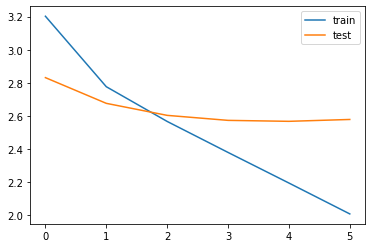

In [ ]:
#4
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

# **9) Inference Model (Predicting):**

Now, it is time for predicting new sentences by the Inference model.
First, we will build two standalone models, one for the encoder and the other for the decoder.

- The Encoder Model is simple, it can be defined as taking the input layer from the trained model's encoder **enc_input**, and outputting the hidden and cell state tensors **enc_states**

- The Decoder Model is more sophisticated, it takes the hidden and cell states from the new encoder model, **dec_input_state_h** as "initial state". But this state should be defined as an input first so it can be assigned to the decoder GRU layer.

In [ ]:
#Inference Encoder Model:
encoder_inf_model=Model(enc_input, [enc_output3, h3])

#Inference Decoder Model:
dec_input_state_h= Input( shape=(features_units_num, ))
dec_states_inputs=[dec_input_state_h]

dec_hidden_state_input = Input(shape=(max_text_length, features_units_num ))
dec_states_inputs_all=[dec_hidden_state_input, dec_input_state_h]

dec_inf_embedding= dec_embedding_layer(dec_input)
#dec_inf_embedding= Embedding(summary_vocab_size, features_units_num, trainable= True)(dec_input)

dec_inf_output, state_h2 = dec_gru(dec_inf_embedding, initial_state=dec_states_inputs)

#attention inference
attn_inf_output, attn_inf_states = attn_layer([dec_hidden_state_input, dec_inf_output])
inf_input_layer = Concatenate(axis=-1, name='concat')([dec_inf_output, attn_inf_output])

dec_inf_output = decoder_dense(inf_input_layer)

decoder_inf_model = Model( [dec_input] + dec_states_inputs_all, [dec_inf_output] + [state_h2])





In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    pred_output, pred_h = encoder_inf_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1)) #[[0]]

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = summary_tokenizer.word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h = decoder_inf_model.predict([target_seq] + [pred_output, pred_h])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if(sampled_token_index not in summary_tokenizer.index_word):
          sampled_token='eos' #To avoid padding tokens
        else:
           sampled_token = summary_tokenizer.index_word[sampled_token_index]

        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
        if(sampled_token == 'eos' or len(decoded_sentence.split()) >= (max_summary_length-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        pred_h = h

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=summary_tokenizer.word_index['start']) and i!=summary_tokenizer.word_index['eos']):
        newString=newString+summary_tokenizer.index_word[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+text_tokenizer.index_word[i]+' '
    return newString

In [ ]:
for i in range(230, 250):
  print("Review:",seq2text(x_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(x_test[i].reshape(1,max_text_length)))
  print("\n")

Review: loved taste smell everything better than used make years ago br br and best delivery second party shipper ever received many thanks br br buy applesauce not disappointed 
Original summary: great taste good 
Predicted summary:  great


Review: some best coffee out there as good not better than seattle s best starbuck good deal price wise order subscription do br smooth rich coffee prefer breakfast blend better than colombia blend changed to 
Original summary: community coffee 
Predicted summary:  excellent coffee


Review: colombian ground coffee lovers brand really love wont sorry all purchasing 
Original summary: real tasty wonderful favor 
Predicted summary:  love it


Review: really love brand coffee coffee nut enjoy drinking this nice smooth great tasting not go wrong choice 
Original summary: love brand coffee 
Predicted summary:  excellent coffee


Review: community coffee colombia classico standard quality everyday type columbia coffee comparable eight clock columbia cof